In [36]:
!pip3 install --upgrade lofar-station-client@git+https://git.astron.nl/lofar2.0/lofar-station-client#@6d06259f3203031031af06256906f0f6ed7ce9b8

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://git.astron.nl/lofar2.0/lofar-station-client to /tmp/pip-install-7b2yo94t/lofar-station-client_d0552f78645348488c968de1586bcecb
  Running command git clone --filter=blob:none --quiet https://git.astron.nl/lofar2.0/lofar-station-client /tmp/pip-install-7b2yo94t/lofar-station-client_d0552f78645348488c968de1586bcecb
  Resolved https://git.astron.nl/lofar2.0/lofar-station-client to commit ff859c8bc35677729aa75297f9a4e7264426406c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [14]:
meas_RCU2L = [0, 1, 6, 7, 28, 29]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]
nsi=len(sis)
print(sis)

[0, 1, 2, 3, 4, 5, 18, 19, 20, 21, 22, 23, 84, 85, 86, 87, 88, 89]


In [5]:
from lofar_station_client.statistics.packet import SSTPacket
import numpy as np

In [25]:
Ncnt=1*60*60 #24 hours
D=np.zeros([nsi,Ncnt,512],dtype='int')
cnt=0
sis0=sis[-1]
with open('sst2/ssts.raw','rb') as f:
    while cnt<Ncnt:
        s2=SSTPacket(f.read(4128))
        if s2.signal_input_index in sis:
            i=sis.index(s2.signal_input_index)
            D[i,cnt,:]=np.array(s2.payload(),dtype='int')
            if i==nsi-1: 
                cnt+=1;
                if cnt%100==0: print(cnt)
    

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


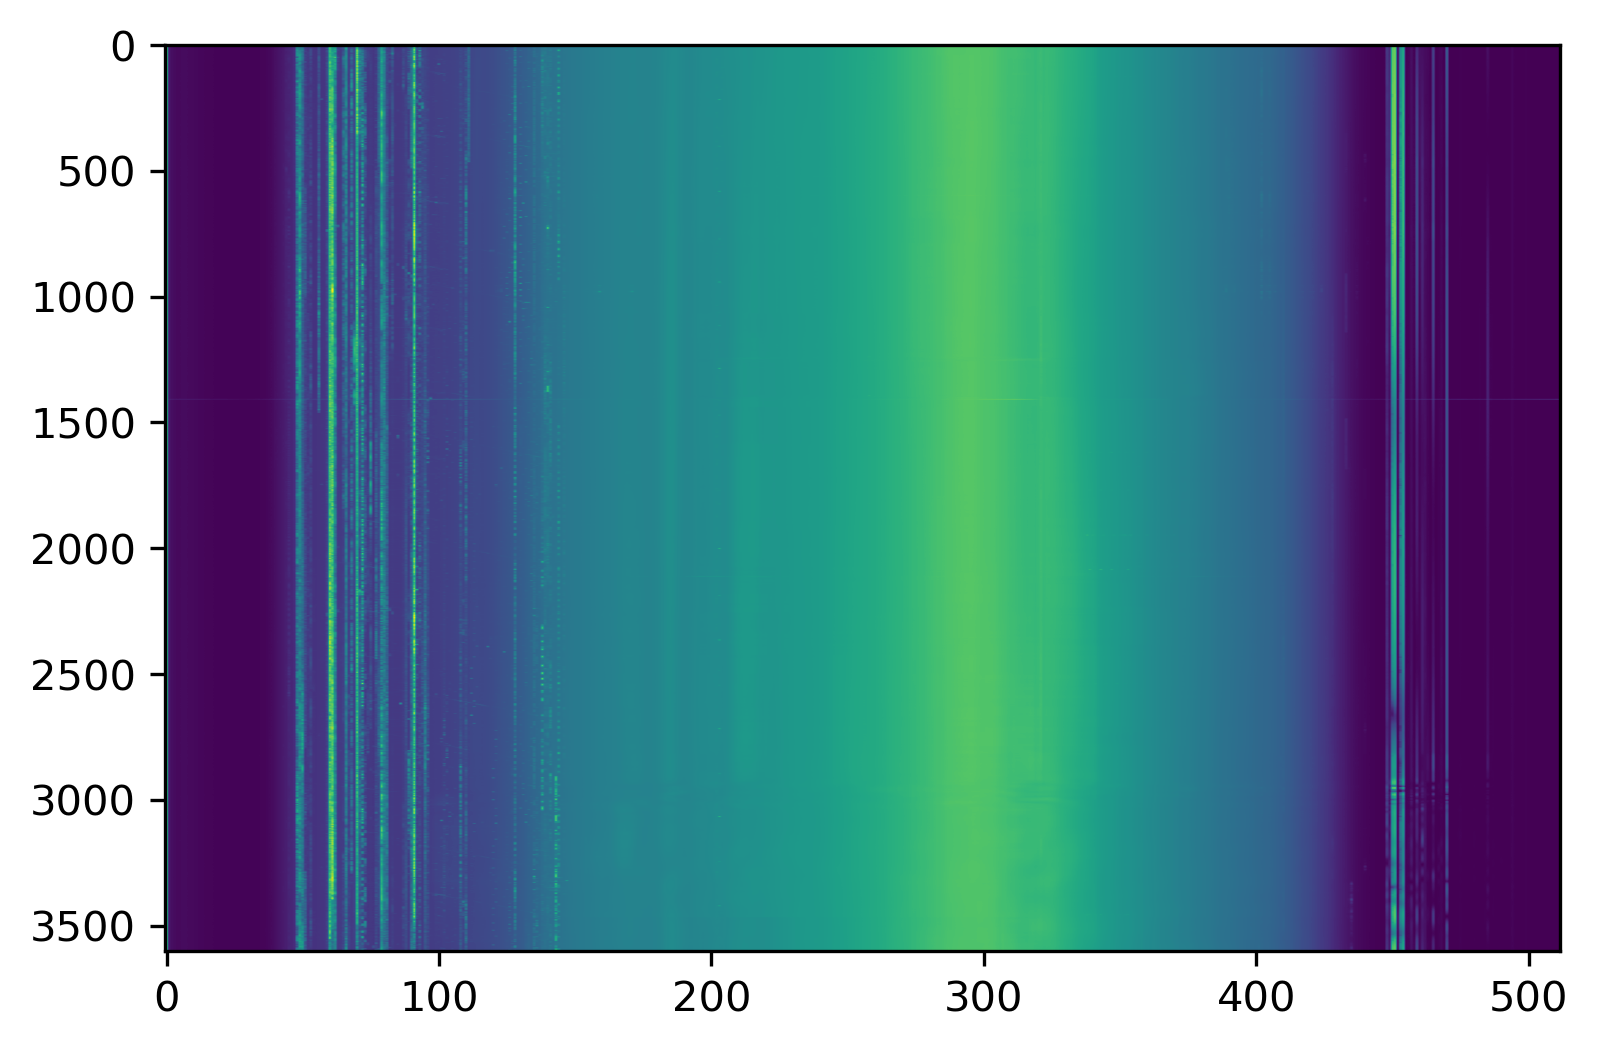

In [34]:
import matplotlib.pyplot as plt
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[4]),aspect='auto')

In [41]:
Dm=np.sum(D,axis=2)
plt.figure(dpi=300)
plt.imshow(10*np.log10(Dm),aspect='auto')
plt.ylabel("LBA input")
plt.xlabel("Time (s)")
plt.title("SST power (dB)")

/tmp/ipykernel_267650/3259760372.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(Dm),aspect='auto')


Text(0.5, 1.0, 'SST power (dB)')